In [1]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import luhn
import folium

### Data import

In [45]:
df = pd.read_csv('fraudTrain.csv')

In [46]:
print(df.shape)
df.head()

(1296675, 23)


Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat      long  city_pop                                job         dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney  1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
df.describe(include='all').transpose()

count   unique                               top  \
Unnamed: 0             1296675.0      NaN                               NaN   
trans_date_trans_time    1296675  1274791               2019-04-22 16:02:01   
cc_num                 1296675.0      NaN                               NaN   
merchant                 1296675      693                 fraud_Kilback LLC   
category                 1296675       14                     gas_transport   
amt                    1296675.0      NaN                               NaN   
first                    1296675      352                       Christopher   
last                     1296675      481                             Smith   
gender                   1296675        2                                 F   
street                   1296675      983        0069 Robin Brooks Apt. 695   
city                     1296675      894                        Birmingham   
state                    1296675       51                                TX   
zip                    1296675.0      NaN                               NaN   
lat                    1296675.0      NaN                               NaN   
long                   1296675.0      NaN                               NaN   
city_pop               1296675.0      NaN                               NaN   
job                      1296675      494                 Film/video editor   
dob                      1296675      968                        1977-03-23   
trans_num                1296675  1296675  0b242abb623afc578575680df30655b9   
unix_time              1296675.0      NaN                               NaN   
merch_lat              1296675.0      NaN                               NaN   
merch_long             1296675.0      NaN                               NaN   
is_fraud               1296675.0      NaN                               NaN   

                         freq                  mean                    std  \
Unnamed: 0                NaN              648337.0          374317.974488   
trans_date_trans_time       4                   NaN                    NaN   
cc_num                    NaN  417192042079726656.0  1308806447000789248.0   
merchant                 4403                   NaN                    NaN   
category               131659                   NaN                    NaN   
amt                       NaN             70.351035             160.316039   
first                   26669                   NaN                    NaN   
last                    28794                   NaN                    NaN   
gender                 709863                   NaN                    NaN   
street                   3123                   NaN                    NaN   
city                     5617                   NaN                    NaN   
state                   94876                   NaN                    NaN   
zip                       NaN          48800.671097           26893.222476   
lat                       NaN             38.537622               5.075808   
long                      NaN            -90.226335              13.759077   
city_pop                  NaN          88824.440563          301956.360689   
job                      9779                   NaN                    NaN   
dob                      5636                   NaN                    NaN   
trans_num                   1                   NaN                    NaN   
unix_time                 NaN     1349243636.726123         12841278.42336   
merch_lat                 NaN             38.537338               5.109788   
merch_long                NaN            -90.226465              13.771091   
is_fraud                  NaN              0.005789               0.075863   

                                 min                25%                 50%  \
Unnamed: 0                       0.0           324168.5            648337.0   
trans_date_trans_time            NaN                NaN                 NaN   
cc_num              

### Validation

In [8]:
df.duplicated().sum()

0

In [9]:
df.duplicated(subset='trans_num', keep=False).sum()

0

Dataset has no duplicated records

In [11]:
print('Min time:', df['trans_date_trans_time'].min())
print('Max time:', df['trans_date_trans_time'].max())
print('trans_date_trans_time=unix_time', df[df['trans_date_trans_time'] == pd.to_datetime(df['unix_time'], unit='s').dt.strftime(date_format='%Y-%m-%d %H:%M:%S')].shape[0])

Min time: 2019-01-01 00:00:18
Max time: 2020-06-21 12:13:37
trans_date_trans_time=unix_time 0


trans_date_trans_time and unix_time contain different dates, which should not be the case. What are the differences?

In [13]:
pd.concat([df['trans_date_trans_time'],
           pd.to_datetime(df['unix_time'], unit='s').dt.strftime(date_format='%Y-%m-%d %H:%M:%S')],
           axis=1).sample(5)

trans_date_trans_time            unix_time
829981   2019-12-10 18:22:25  2012-12-10 18:22:25
940391   2020-01-10 16:44:19  2013-01-10 16:44:19
441408   2019-07-15 14:38:45  2012-07-15 14:38:45
51707    2019-01-31 10:10:35  2012-01-31 10:10:35
868253   2019-12-19 18:13:12  2012-12-19 18:13:12

Seems trans_date_trans_time and unix_time have 7 years of difference. Let's check

In [15]:
print('trans_date_trans_time+7y=unix_time', df[df['trans_date_trans_time'] == (pd.to_datetime(df['unix_time'], unit='s') 
                                             + pd.offsets.DateOffset(years=7)).dt.strftime(date_format='%Y-%m-%d %H:%M:%S')].shape[0], 'of', df.shape[0])

trans_date_trans_time+7y=unix_time 1296675 of 1296675


trans_date_trans_time and unix_time have 7 years difference. As per dataset description, feature time has correct year. 

As per https://en.wikipedia.org/wiki/Payment_card_number, cc_num can be validated by luhn algorithm

In [17]:
invalid = 0

for card_num in df['cc_num'].astype(str):
    if not luhn.verify(card_num):
        invalid += 1

print('Not valid card numbers:', invalid)

Not valid card numbers: 0


### Preprocessing

In [19]:
#first and last names have no valueable information as we can't build systems biased against names
#trans_num also isn't useful as it is generated randomly
#df.drop(columns=['first', 'last', 'trans_num'], inplace=True)

In [20]:
#df.rename(columns={'trans_date_trans_time':'time', 'cc_num':'card'}, inplace=True)

In [21]:
date = pd.to_datetime(df['unix_time'], unit='s') + pd.offsets.DateOffset(years=7)
date

0         2019-01-01 00:00:18
1         2019-01-01 00:00:44
2         2019-01-01 00:00:51
3         2019-01-01 00:01:16
4         2019-01-01 00:03:06
                  ...        
1296670   2020-06-21 12:12:08
1296671   2020-06-21 12:12:19
1296672   2020-06-21 12:12:32
1296673   2020-06-21 12:13:36
1296674   2020-06-21 12:13:37
Name: unix_time, Length: 1296675, dtype: datetime64[ns]

In [22]:
#now let's extract some information from existing features for further analysis
 
df['trans_month'] = date.dt.month
df['trans_day'] = date.dt.day
df['trans_day_time'] = df['unix_time'] % 86400
df['trans_hour'] = date.dt.hour 
df['trans_minute'] = date.dt.minute
df['trans_second'] = date.dt.second
df[['time', 'trans_month', 'trans_day', 'trans_hour', 'trans_minute', 'trans_second', 'unix_time', 'trans_day_time']].tail()

time  trans_month  trans_day  trans_hour  \
1296670  2020-06-21 12:12:08            6         21          12   
1296671  2020-06-21 12:12:19            6         21          12   
1296672  2020-06-21 12:12:32            6         21          12   
1296673  2020-06-21 12:13:36            6         21          12   
1296674  2020-06-21 12:13:37            6         21          12   

         trans_minute  trans_second   unix_time  trans_day_time  
1296670            12             8  1371816728           43928  
1296671            12            19  1371816739           43939  
1296672            12            32  1371816752           43952  
1296673            13            36  1371816816           44016  
1296674            13            37  1371816817           44017

In [23]:
#As time and unix_time represent same onformation(with 7 years difference), we can remove time
#First Name and L
#df.drop(columns='time', inplace=True)

In [24]:
#card number contains issuer identification number(IIN), but it can be 6 or 8 digits long
#let's compare amount of unique first 6 or 8 digits with amount of cards
print('Unique cards:', len(df['card'].astype(str).unique()))
print('Unique 6 digit:', len(df['card'].astype(str).apply(lambda x: x[0:6]).unique()))
print('Unique 8 digit:', len(df['card'].astype(str).apply(lambda x: x[0:8]).unique()))

Unique cards: 983
Unique 6 digit: 960
Unique 8 digit: 983


In [25]:
#amount of 8 digit IIN is same as number of cards, so it's more likely that cards have 6-digit IINs
#but 960 different card issuers is too close to 983 unique cards, makung it useless for machine learning
#Still we can try to get industry codes, that is 1st digic in card number
print('Unique industry codes:', df['card'].astype(str).apply(lambda x: x[0:1]).unique())

Unique industry codes: ['2' '6' '3' '4' '1' '5']


In [26]:
#card number has no more useful information for us
df['industry_code'] = df['card'].astype(str).apply(lambda x: x[0:1])
#df.drop(columns='card', inplace=True)

In [101]:
#most obvious usage of coordinates is calculation of distance
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371
    return c * r

df['distance'] = haversine(df['lat'], df['long'], df['merch_lat'], df['merch_long'])

In [28]:
#age is derivative feature of date of birth
df['age'] = (pd.to_datetime('today') - pd.to_datetime(df['dob'], format='%Y-%m-%d')).dt.days/365  
#df.drop(columns='dob', inplace=True)
df['age']

0          36.654795
1          46.378082
2          62.808219
3          57.824658
4          38.605479
             ...    
1296670    62.961644
1296671    44.904110
1296672    57.194521
1296673    44.216438
1296674    29.213699
Name: age, Length: 1296675, dtype: float64

In [29]:
#for easier analysis I encode non-numerical features
encoders = {}#  in case string values will be needed
'''
for col in ['merchant', 'category', 'street', 'city', 'state', 'job', 'gender', 'industry_code']:
    enc = LabelEncoder()
    df[col] = enc.fit_transform(df[col])
    encoders[col] = enc
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 32 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Unnamed: 0      1296675 non-null  int64  
 1   time            1296675 non-null  object 
 2   card            1296675 non-null  int64  
 3   merchant        1296675 non-null  object 
 4   category        1296675 non-null  object 
 5   amt             1296675 non-null  float64
 6   first           1296675 non-null  object 
 7   last            1296675 non-null  object 
 8   gender          1296675 non-null  object 
 9   street          1296675 non-null  object 
 10  city            1296675 non-null  object 
 11  state           1296675 non-null  object 
 12  zip             1296675 non-null  int64  
 13  lat             1296675 non-null  float64
 14  long            1296675 non-null  float64
 15  city_pop        1296675 non-null  int64  
 16  job             1296675 non-null  ob

In [30]:
df.head()

Unnamed: 0                 time              card  \
0           0  2019-01-01 00:00:18  2703186189652095   
1           1  2019-01-01 00:00:44      630423337322   
2           2  2019-01-01 00:00:51    38859492057661   
3           3  2019-01-01 00:01:16  3534093764340240   
4           4  2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat      long  city_pop                                job         dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney  1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  trans_month  trans_day  trans_day_time  trans_hour  trans_minute  \
0         0            1          1              18           0             0   
1         0            1          1              44           0             0   
2         0            1          1              51           0             0   
3         0            1          1              76           0             1   
4         0            1          1             186           0             3   

   trans_second industry_code    distance        age  
0            18             2   78.597568  36.654795  
1            44             6   30.212176  46.378082  
2            51             3  108.206083  62.808219  
3            16             3   95.673231  57.824658  
4             6             3   77.556744  38.605479

### EDA

In [32]:
def distplot(series):  
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.1, .9)})

    sns.boxplot(series, orient="h", ax=ax_box)
    sns.histplot(series, bins=30, stat='density', ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

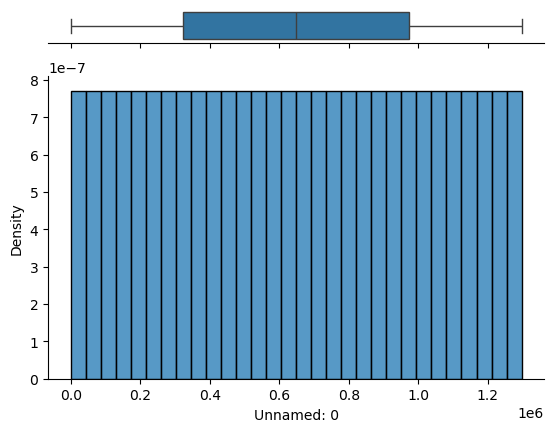

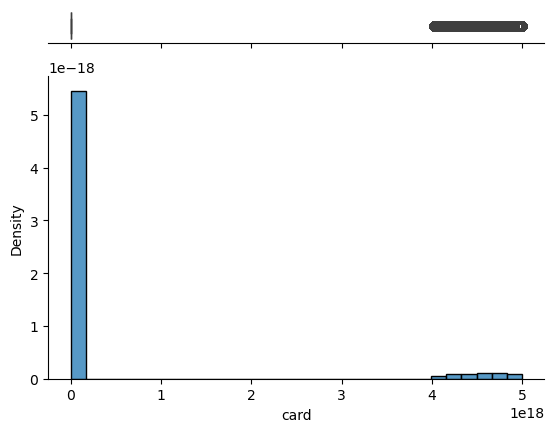

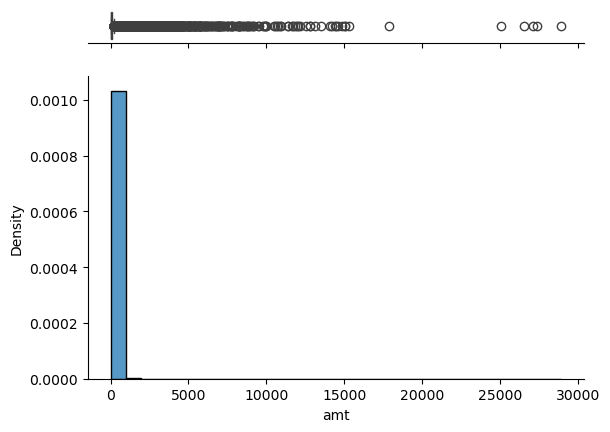

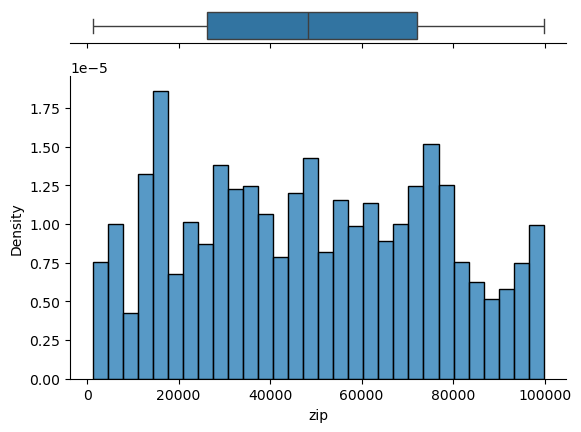

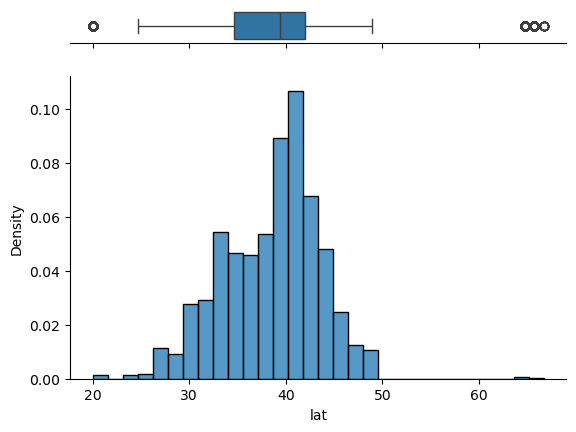

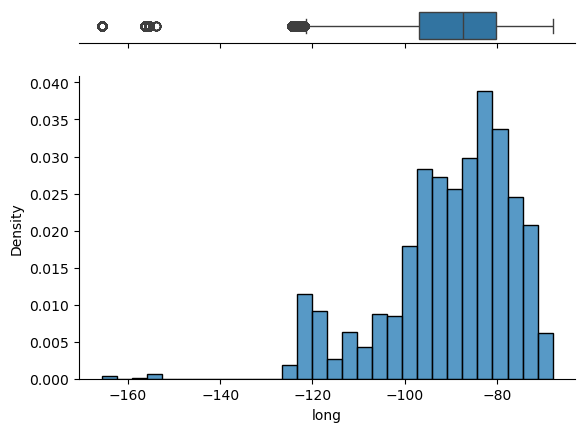

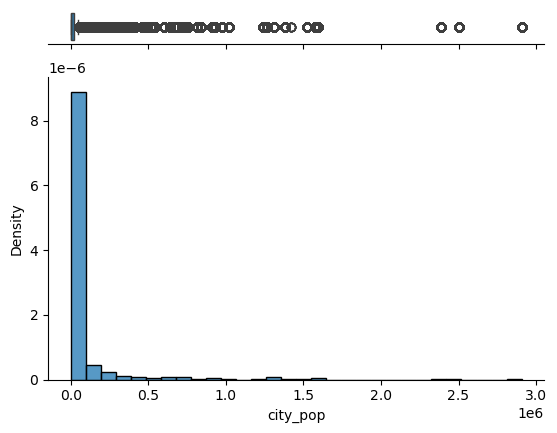

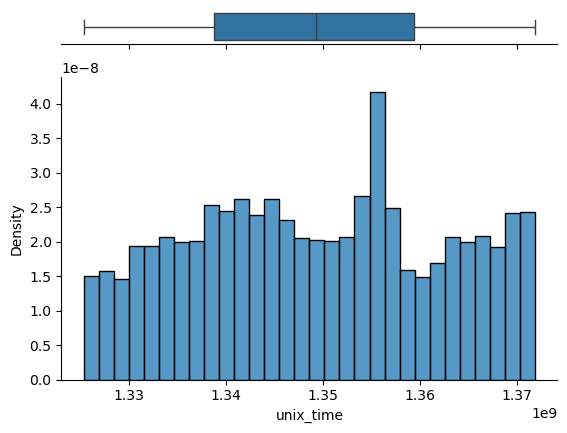

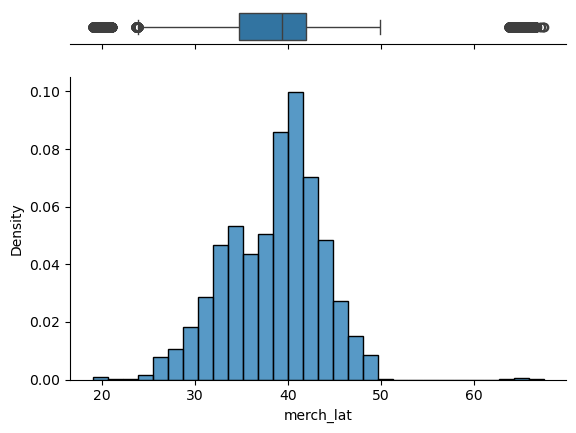

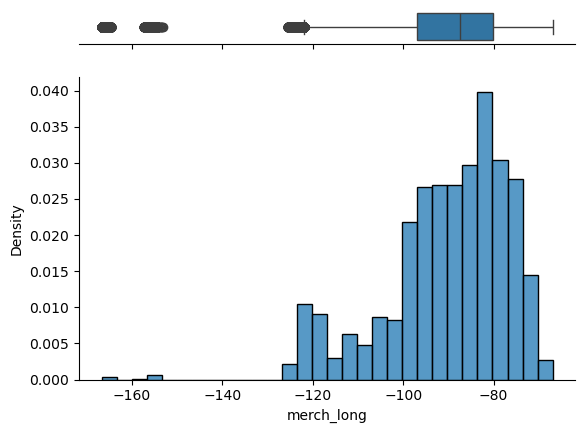

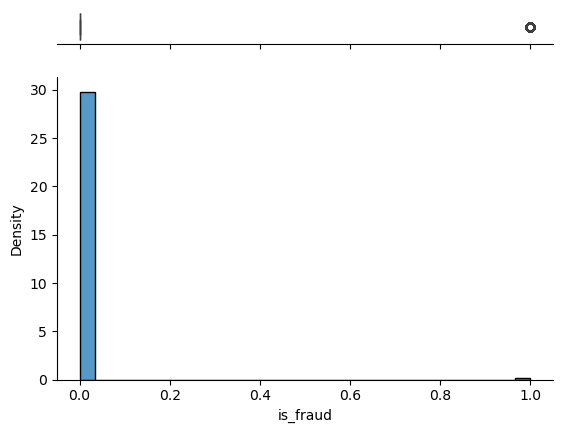

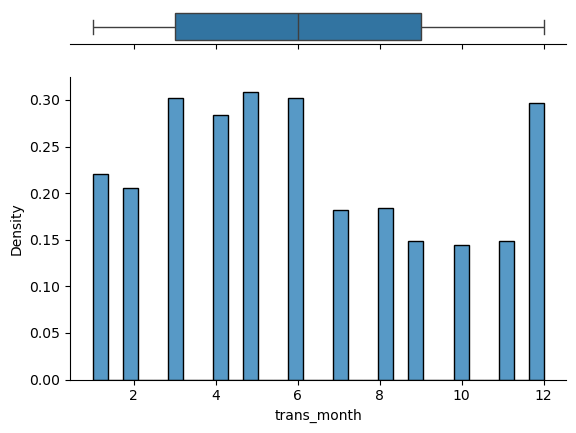

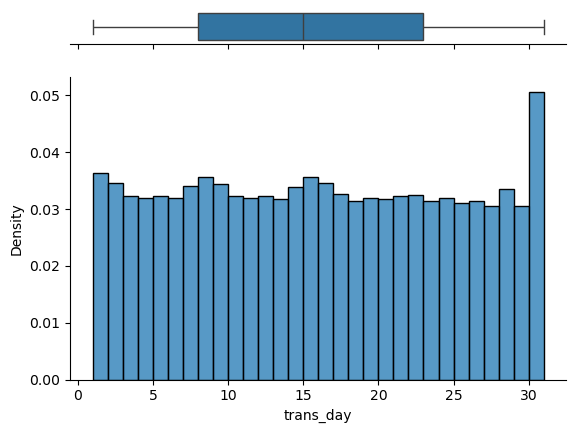

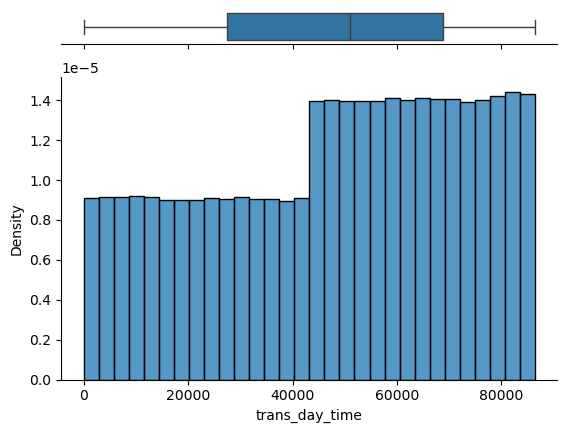

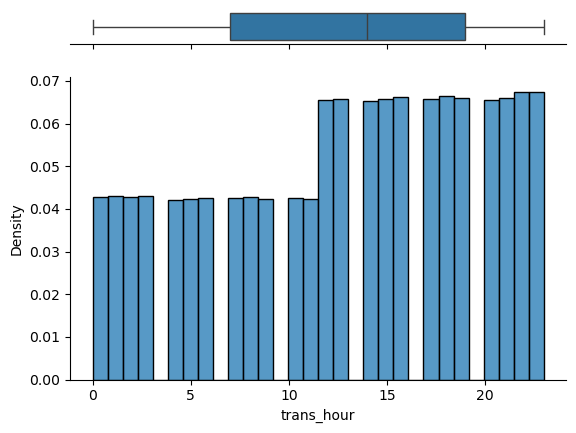

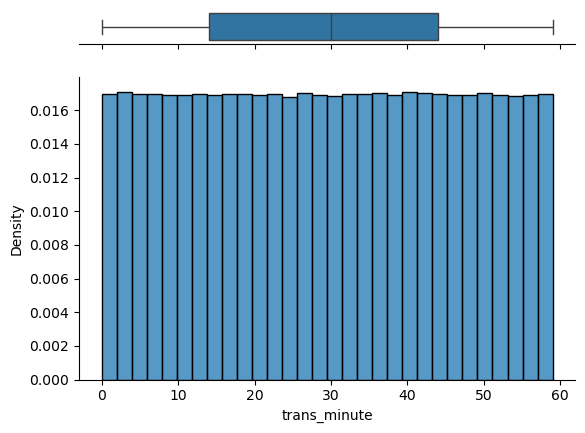

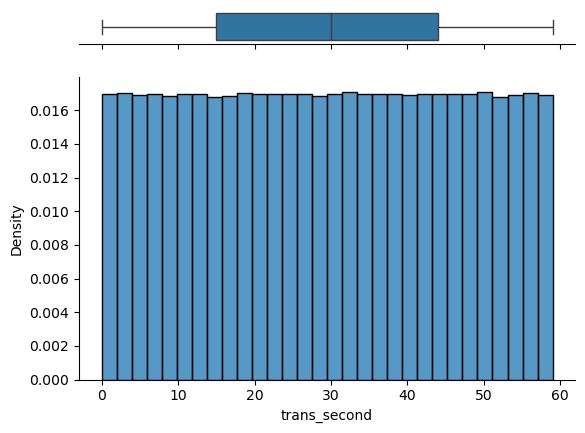

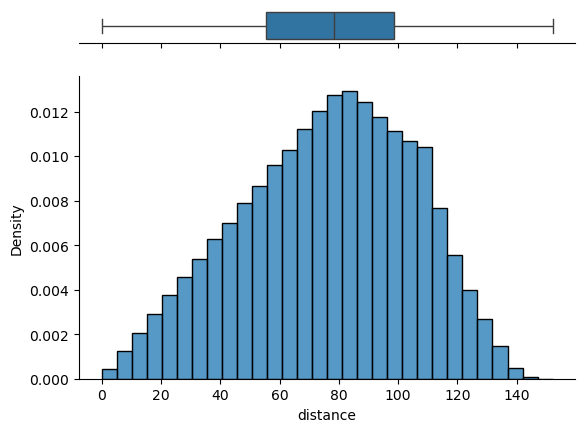

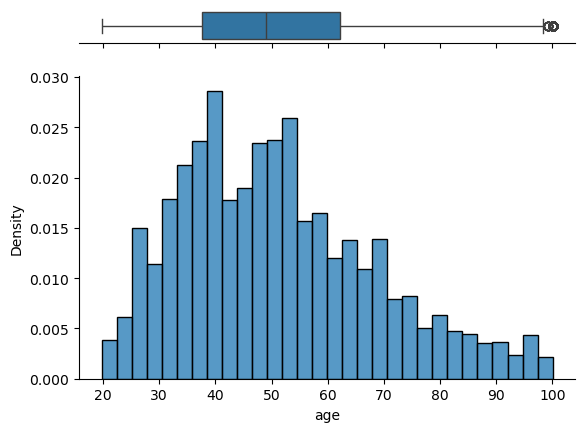

In [33]:
num_cols = df.select_dtypes(include='number').columns

for c in num_cols:
    distplot(df[c])

In [34]:
#most of transactions had low amount, done in cities with low population.There was a spike in transactions amount.
#Dataset is significantly imbalanced. Most treansactions were made after 12:00 
#at distances about 80km

18:44


C:\Users\dfskl\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


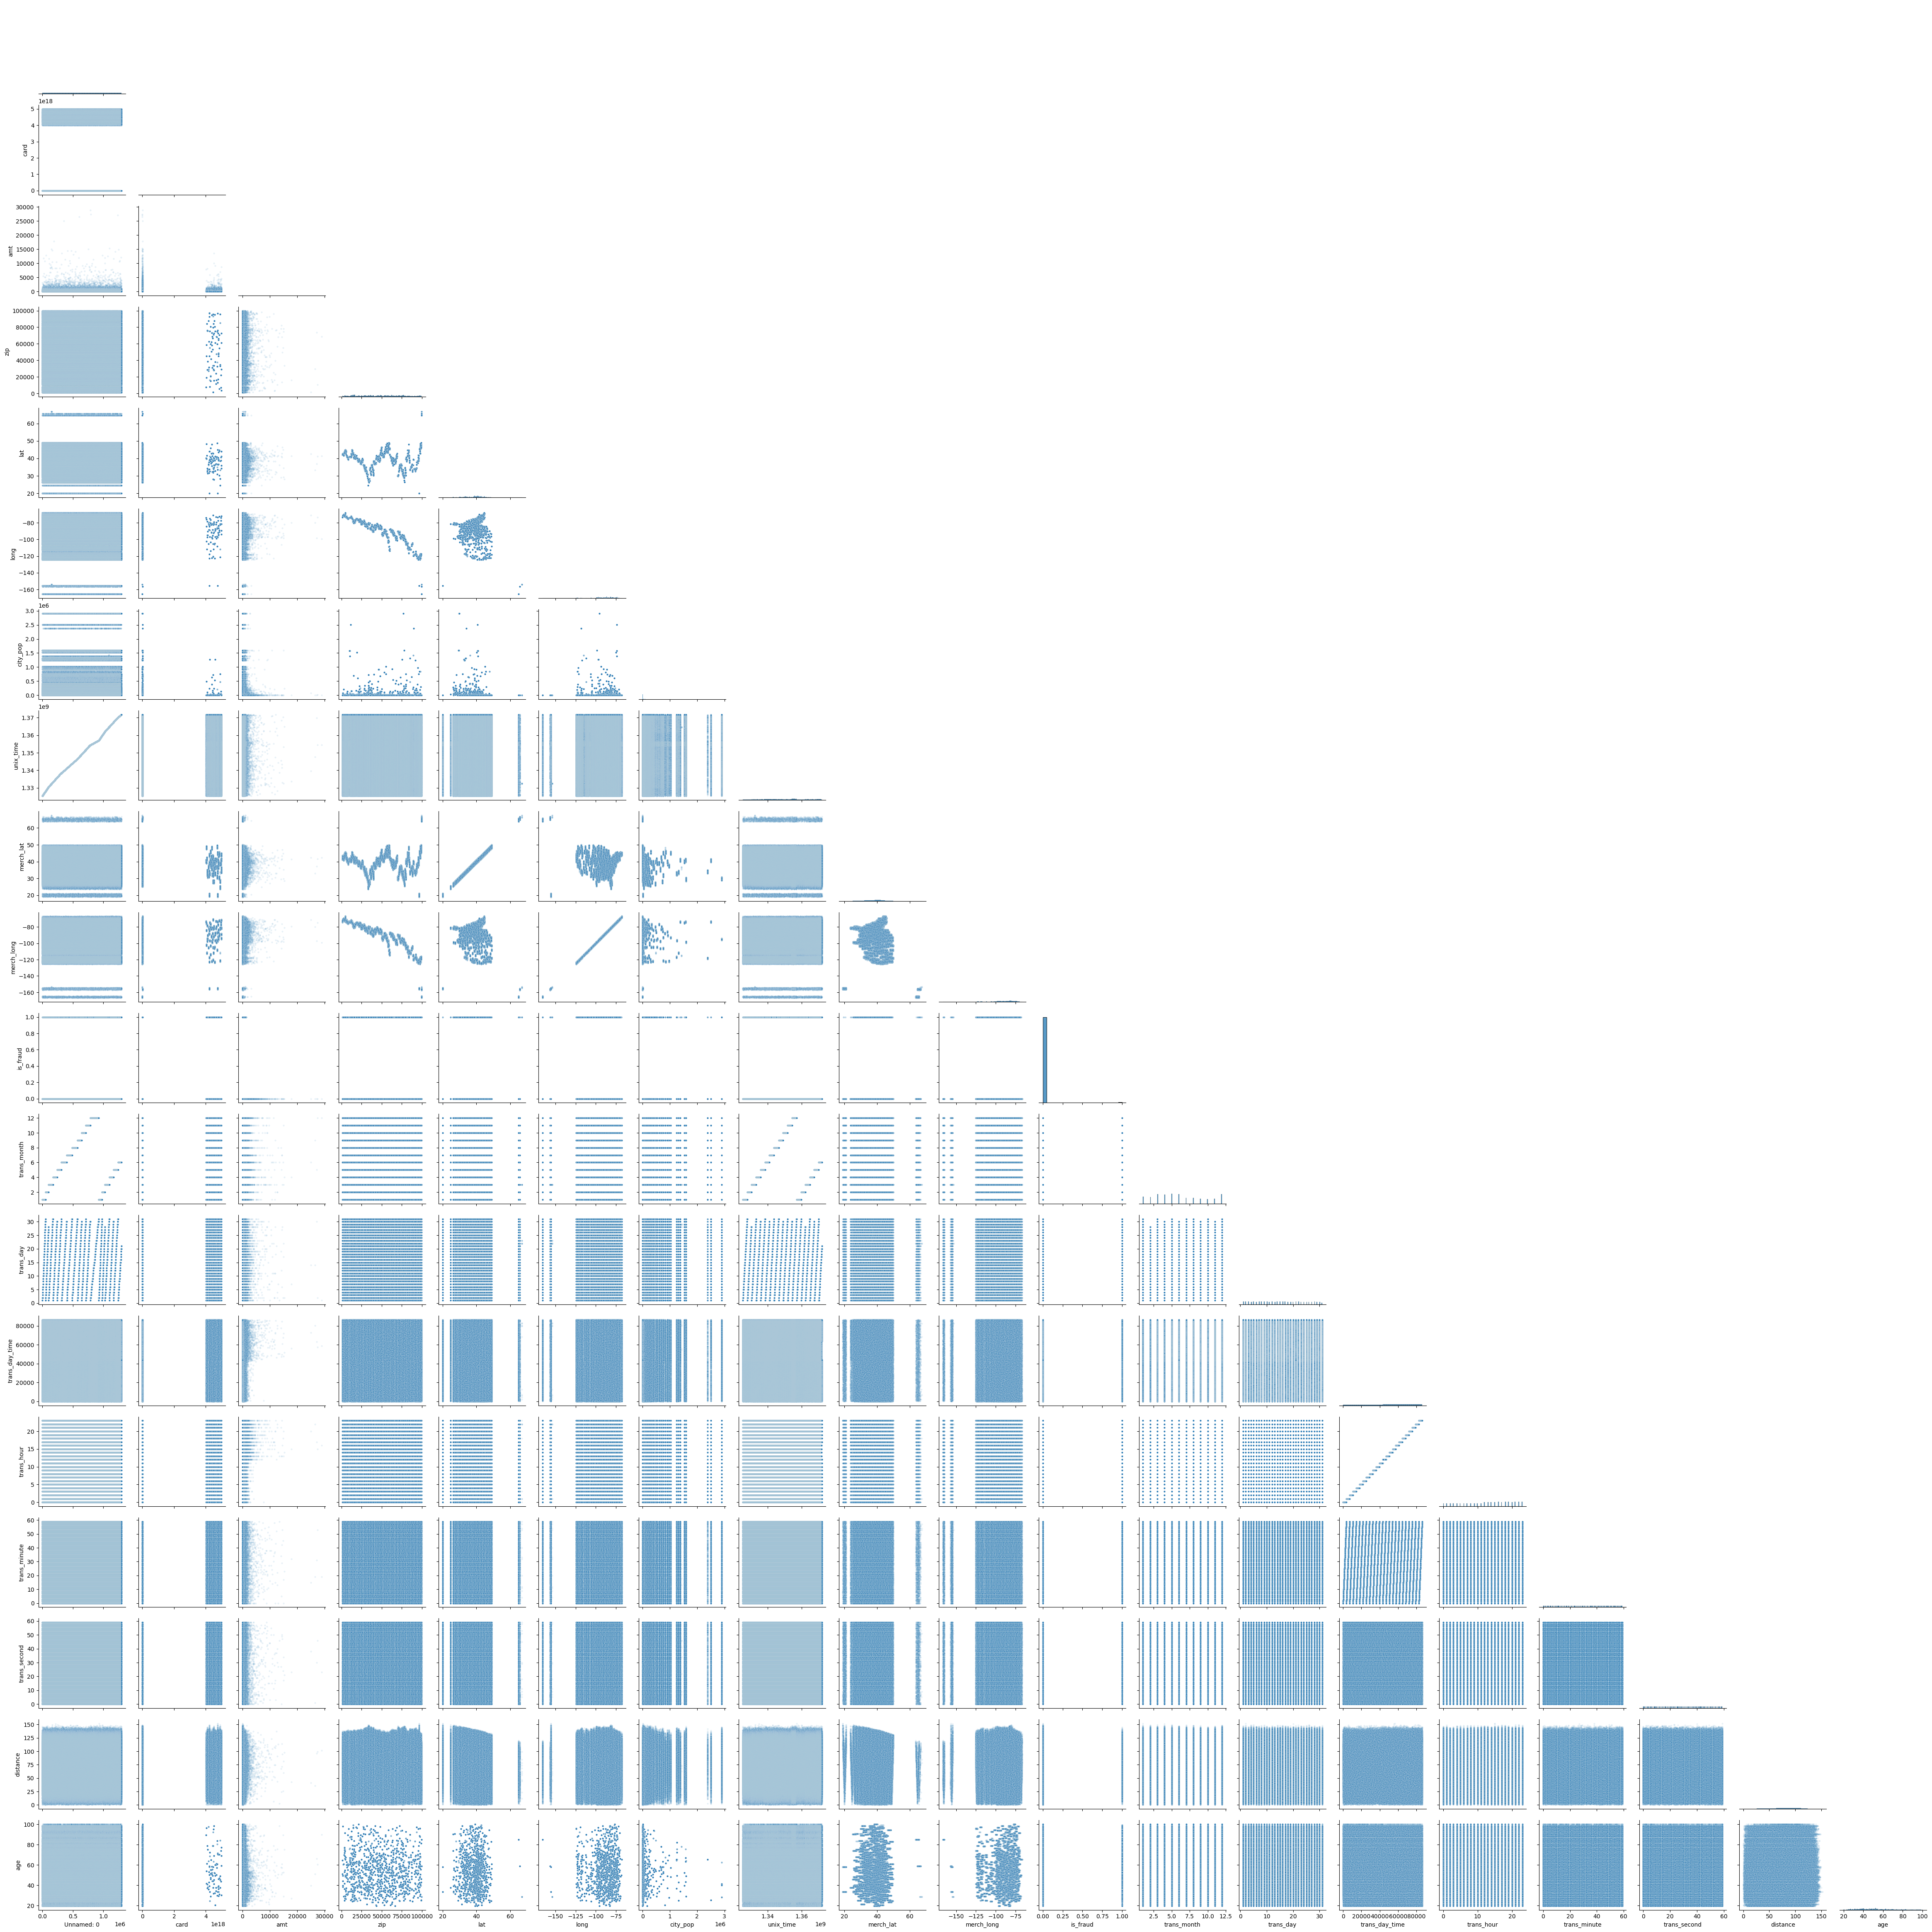

18:48


In [35]:
import time
print(time.strftime("%H:%M", time.localtime()))
sns.pairplot(df, corner = True, plot_kws={'alpha':0.1}, markers='.');
plt.show()
plt.clf()
plt.close() 
print(time.strftime("%H:%M", time.localtime()))

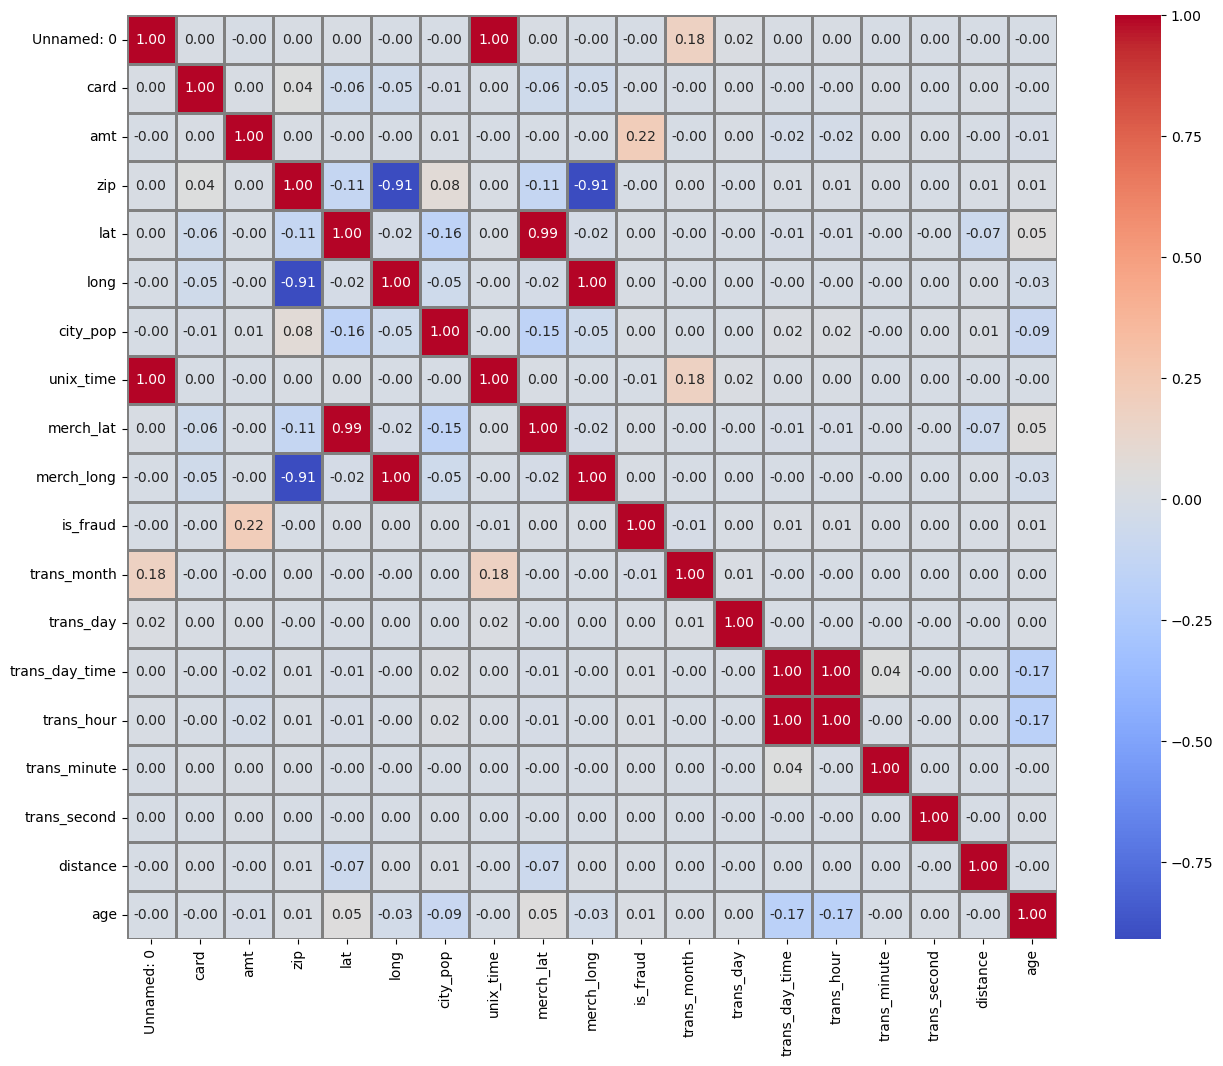

In [36]:
plt.figure(figsize=(15, 12)) 
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, linecolor='gray');

In [37]:
m = folium.Map(location=(df.loc[0, 'lat'], df.loc[0, 'long']), zoom_start=3)
'''
for index, row in df.groupby(['lat','long']).size().reset_index().iterrows():
    folium.Circle(
        location=(row['lat'], row['long']),
        radius=20,
        fill=True, 
        color="blue"
    ).add_to(m)
    
for index, row in df.head(10000).groupby(['merch_lat','merch_long']).size().reset_index().iterrows():
    folium.Circle(
        location=(row['merch_lat'], row['merch_long']),
        radius=20,
        fill=True, 
        color="yellow"
    ).add_to(m)
'''
for index, row in df.iterrows():
    if row['is_fraud']:
        line_color = 'red'
        opacity = 1
    else:
        line_color = 'green'
        opacity = 0.1
        
    folium.PolyLine(locations=[[row['lat'], row['long']], [row['merch_lat'], row['merch_long']]], 
                               color=line_color, weight=2, opacity=opacity).add_to(m)

m

### imported

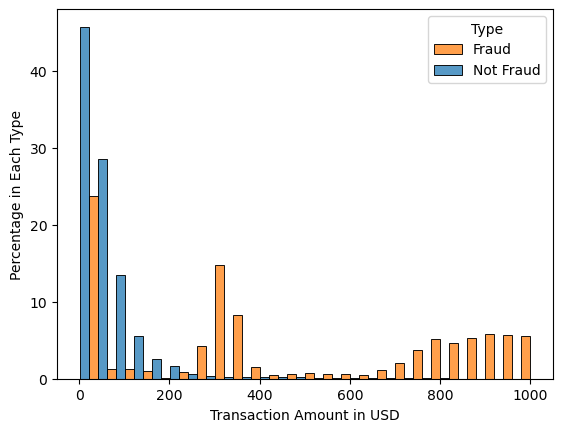

In [39]:
#amount vs fraud
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

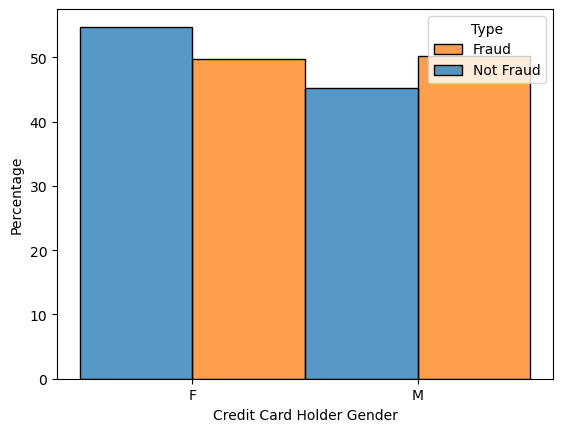

In [40]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

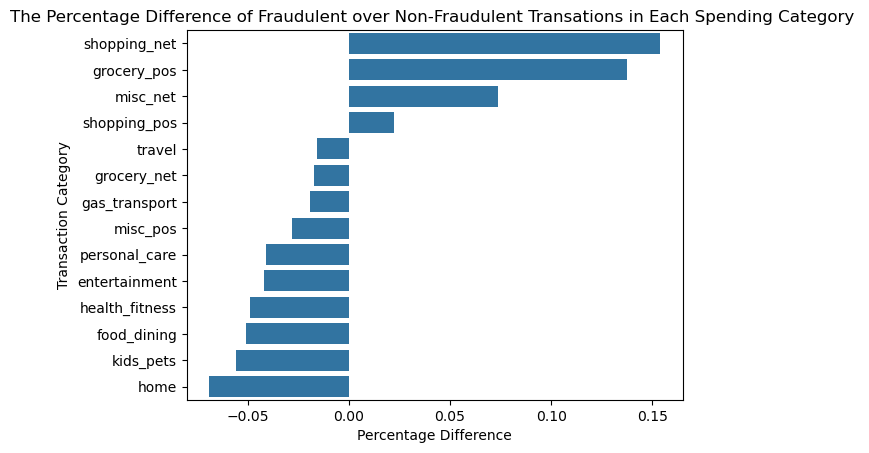

In [41]:
#calculate the percentage difference
a=df[df['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=df[df['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

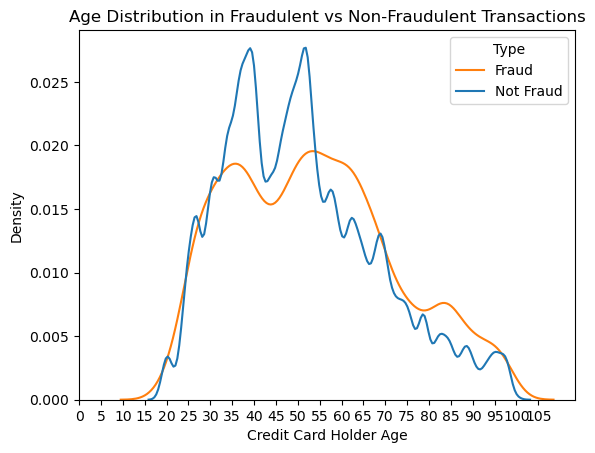

In [42]:
#age vs fraud
import datetime as dt
df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

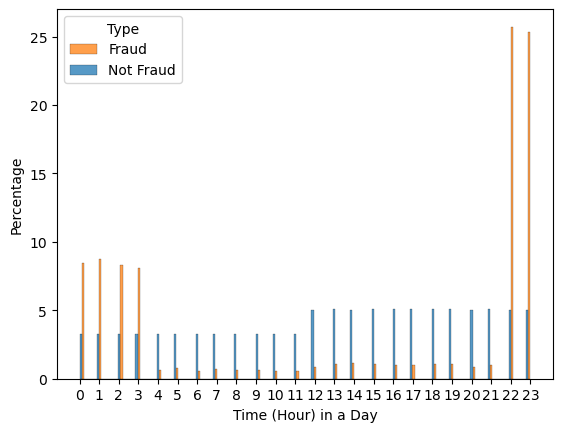

In [51]:
#time in a day vs fraud
df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

C:\Users\dfskl\AppData\Local\Temp\ipykernel_9848\3206469556.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


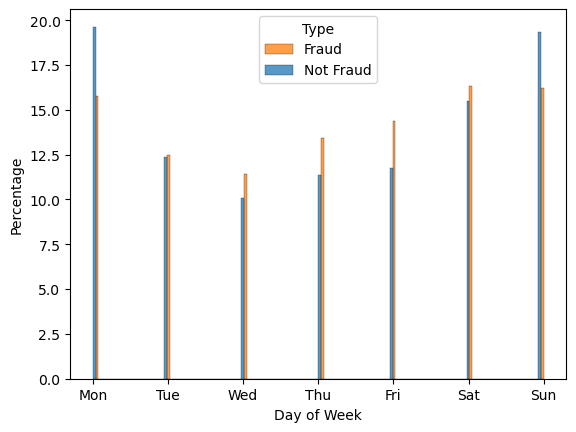

In [53]:
#day of week vs fraud
df['day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

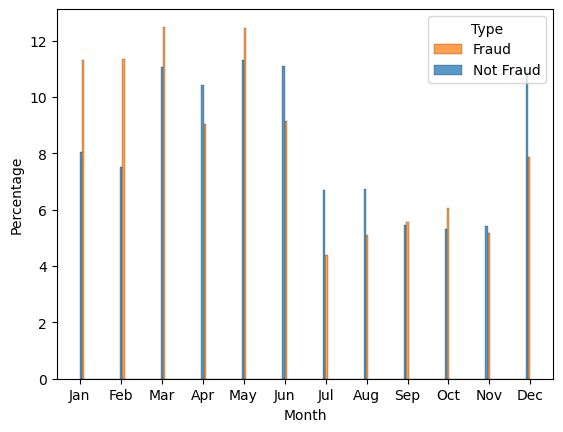

In [55]:
#month vs fraud
df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
ax=sns.histplot(data=df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Text(0.5, 1.0, 'The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

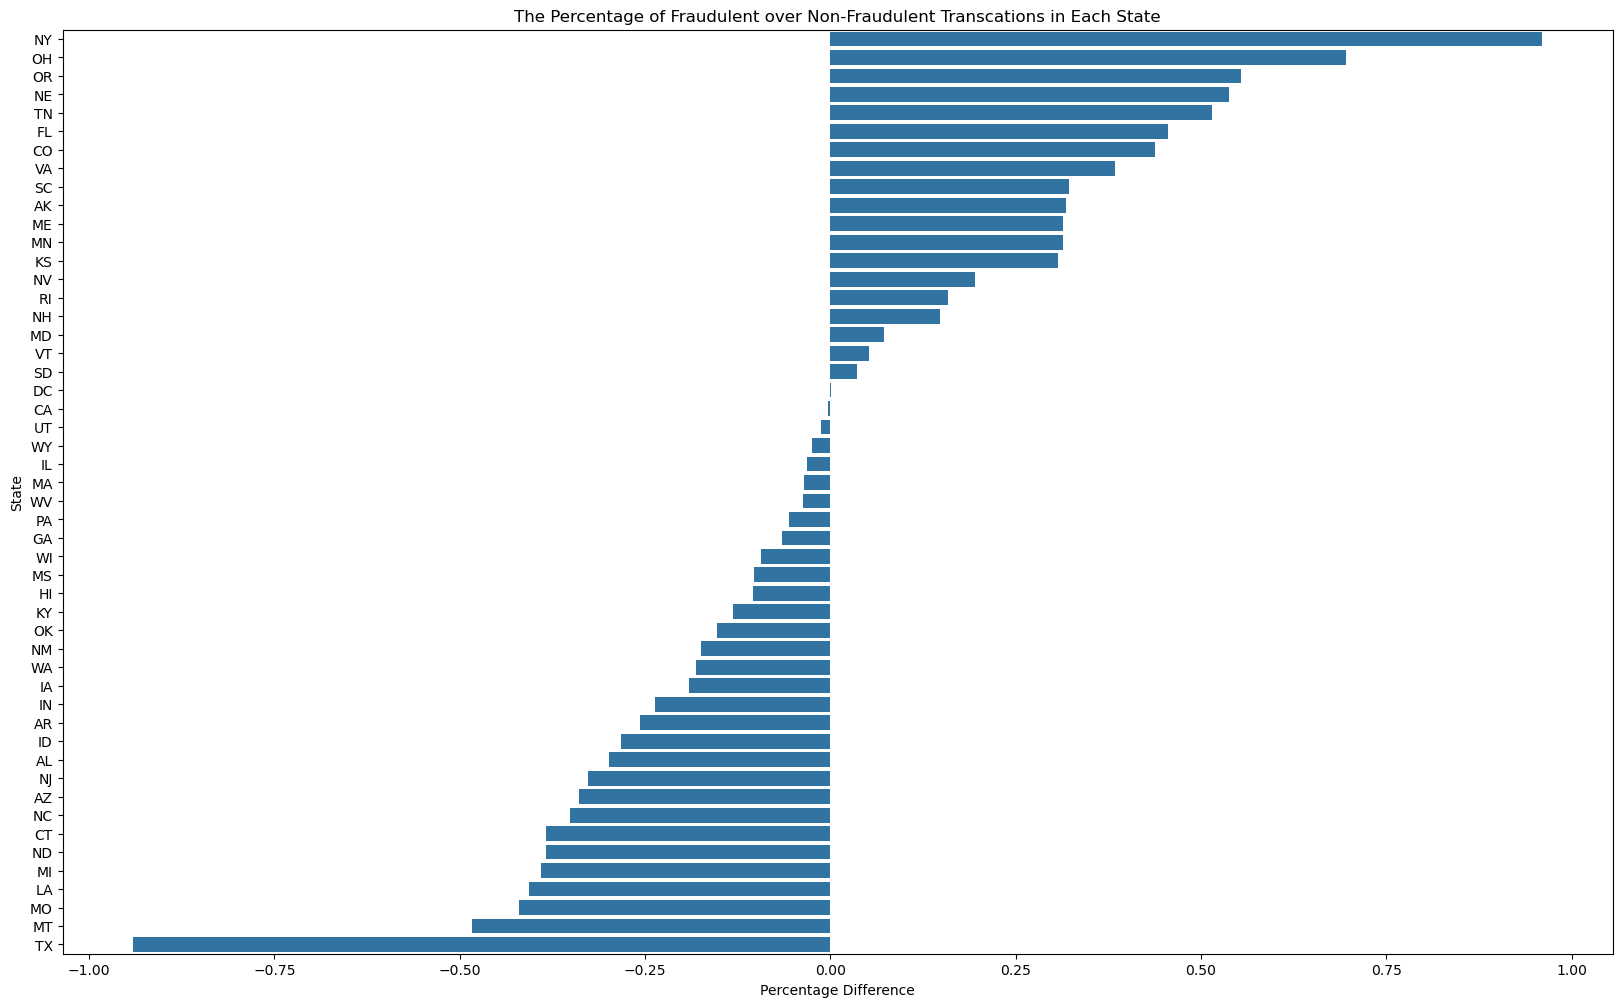

In [115]:
a=df['state'][df.is_fraud==0].value_counts(normalize=True)
a=a.to_frame()
a=a.reset_index()
a.columns = ['State', 'Per']

b=df['state'][df.is_fraud==1].value_counts(normalize=True)
b=b.to_frame()
b=b.reset_index()
b.columns = ['State', 'Per']
merged=a.merge(b,on='State')
merged['diff']=merged['Per_y']-merged['Per_x']
merged['diff']=merged['diff']*100
merged=merged.sort_values('diff',ascending=False)

plt.figure(figsize=(20, 12)) 
ax1=sns.barplot(data=merged, x='diff',y='State')
ax1.set_xlabel('Percentage Difference')
ax1.set_ylabel('State')
plt.title('The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

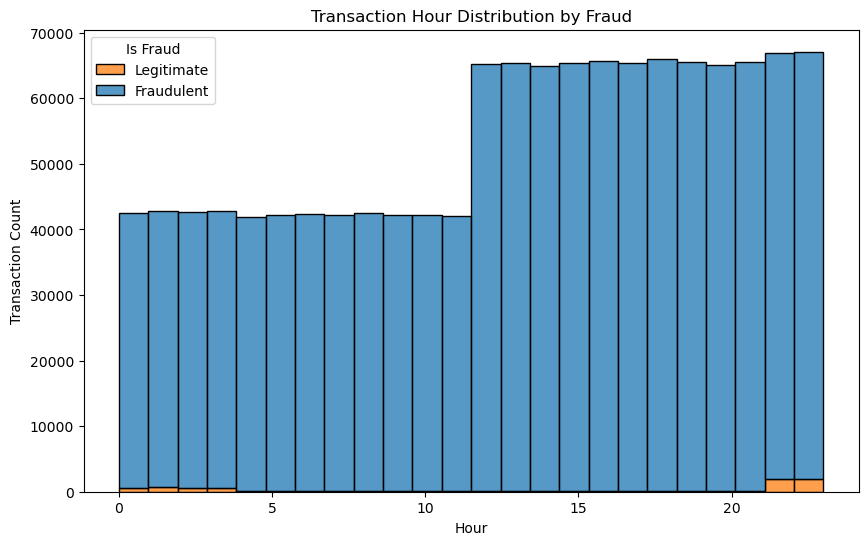

In [59]:
# Transaction Time and Fraud Correlation
df['trans_hour'] = pd.to_datetime(df['trans_date_trans_time']).dt.hour
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='trans_hour', hue='is_fraud', multiple='stack', bins=24)
plt.title('Transaction Hour Distribution by Fraud')
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud', labels=['Legitimate', 'Fraudulent'])  # Specify legend labels
plt.show()

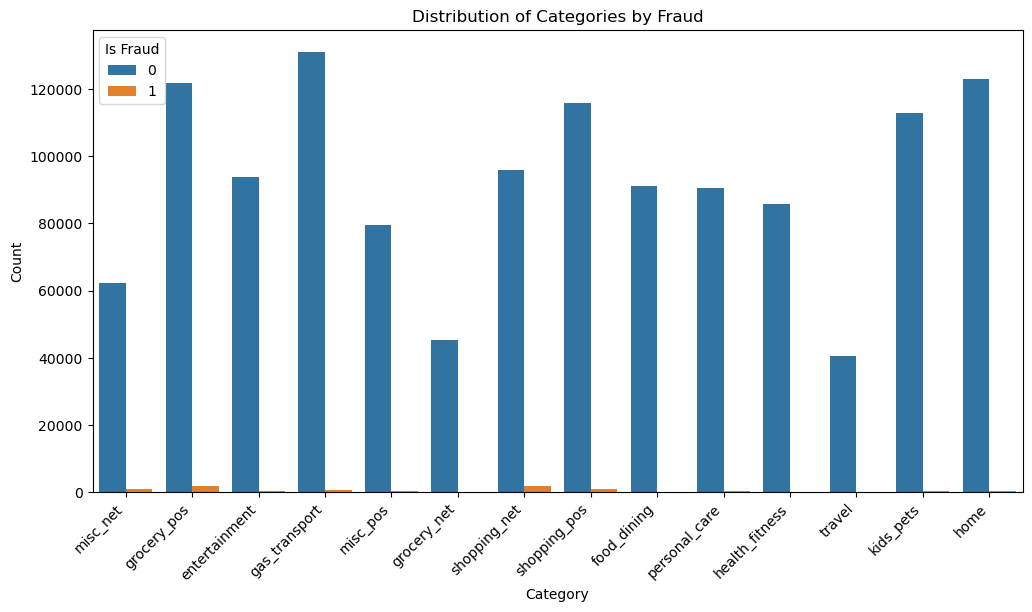

In [63]:
# Explore categorical features (e.g., category)
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=df)
plt.title('Distribution of Categories by Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()

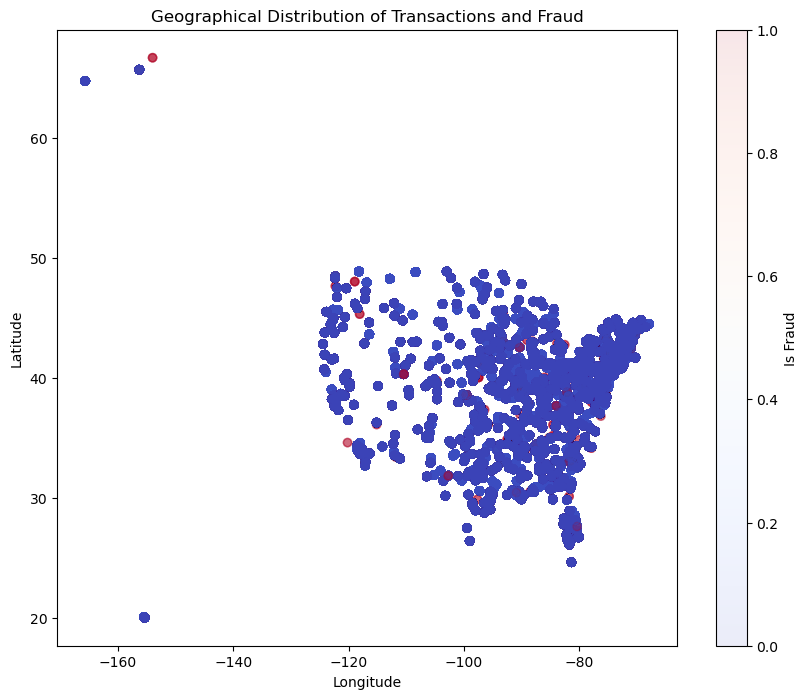

In [117]:
# Scatter plot of geographical data
plt.figure(figsize=(10, 8))
plt.scatter(df['long'], df['lat'], c=df['is_fraud'], cmap='coolwarm', alpha=0.1)
plt.title('Geographical Distribution of Transactions and Fraud')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Is Fraud')
plt.show()

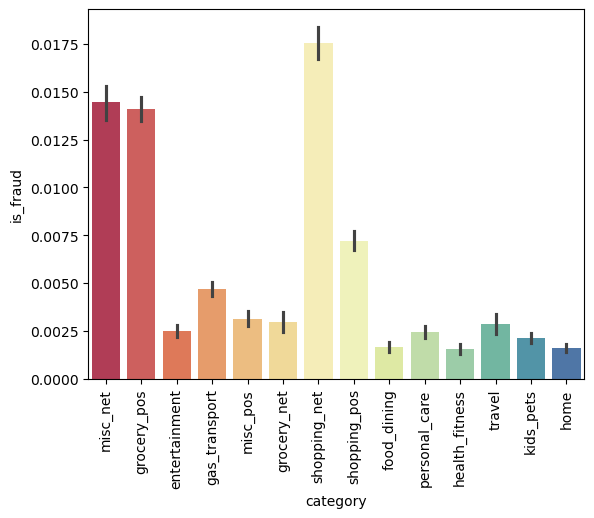

In [85]:
sns.barplot(x=df['category'],y=df['is_fraud'], palette='Spectral', hue=df['category'])
plt.xticks(rotation=90);